In [58]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

import matplotlib.pyplot as plt

In [104]:
with open('results/experiment1.json', 'r') as file:
        experiment1 = json.load(file)

In [52]:
experiment1_df = pd.DataFrame(experiment1)
experiment1_df.loc[experiment1_df.dataset.isin(filt) & experiment1_df.recovers_LA.eq(False),  ['dataset', 'method', 'model', 'run', 'coef_init', 'marginalPProb']]
quantities = ['dataset', 'method', 'run', 'n', 'p', 'model', 'marginalPProb']
df_graph_1 = [{key: value for key, value in d.items() if key in quantities} for d in experiment1]
df_graph_1 = pd.DataFrame(df_graph_1)
df_graph_1[[str(i) for i in range(1, 12)]] = pd.DataFrame(df_graph_1.marginalPProb.tolist(), index= df_graph_1.index)
df_graph_1.drop(columns=['marginalPProb'], inplace = True)
df_graph_1_final = pd.melt(df_graph_1, 
                           id_vars=['model', 'method', 'dataset', 'run'], 
                           value_vars=[str(i) for i in range(1, 12)], 
                           var_name='covariate',
                           value_name='marginalPProb')

df_graph_1_final["covariate"] = pd.to_numeric(df_graph_1_final.covariate)

df_graph_1_final = pd.merge(df_graph_1_final[df_graph_1_final.method == "ALASMC"], 
                            df_graph_1_final.loc[df_graph_1_final.method == "LA", ['dataset', 'model', 'marginalPProb', 'covariate']],
                            how='left', on=['model', 'dataset', 'covariate'], suffixes=['', '_LA'])

df_graph_1_final["marginalPProb_diff"] = df_graph_1_final.marginalPProb - df_graph_1_final.marginalPProb_LA
df_graph_1_final.drop(columns=['marginalPProb', 'marginalPProb_LA'], inplace=True)

,dataset,method,n,p,model,run,1,2,3,4,5,6,7,8,9,10,11
1281,26,ALASMC,1000,10,Binomial Logit,5.0,1.0,0.6810,0.3878,0.5368,0.5438,0.4088,0.6070,0.5780,0.6472,0.6632,NaN
2811,26,ALASMC,1000,11,Poisson,5.0,1.0,0.0158,0.0206,0.1268,1.0000,1.0000,0.0042,0.0126,0.0098,0.0156,0.0052


## Graph 1 (v1)

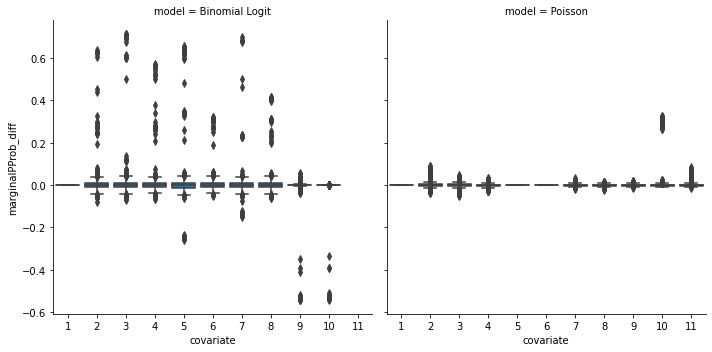

In [109]:
quantities = ['dataset', 'method', 'run', 'n', 'p', 'model', 'marginalPProb']
df_graph_1 = [{key: value for key, value in d.items() if key in quantities} for d in experiment1]
df_graph_1 = pd.DataFrame(df_graph_1)
df_graph_1[[str(i) for i in range(1, 12)]] = pd.DataFrame(df_graph_1.marginalPProb.tolist(), index= df_graph_1.index)
df_graph_1.drop(columns=['marginalPProb'], inplace = True)
df_graph_1_final = pd.melt(df_graph_1, 
                           id_vars=['model', 'method', 'dataset', 'run'], 
                           value_vars=[str(i) for i in range(1, 12)], 
                           var_name='covariate',
                           value_name='marginalPProb')

df_graph_1_final["covariate"] = pd.to_numeric(df_graph_1_final.covariate)

df_graph_1_final = pd.merge(df_graph_1_final[df_graph_1_final.method == "ALASMC"], 
                            df_graph_1_final.loc[df_graph_1_final.method == "LA", ['dataset', 'model', 'marginalPProb', 'covariate']],
                            how='left', on=['model', 'dataset', 'covariate'], suffixes=['', '_LA'])

df_graph_1_final["marginalPProb_diff"] = df_graph_1_final.marginalPProb - df_graph_1_final.marginalPProb_LA
df_graph_1_final.drop(columns=['marginalPProb', 'marginalPProb_LA'], inplace=True)
g = sns.FacetGrid(data=df_graph_1_final, col="model", height=5)
g.map_dataframe(sns.boxplot, x="covariate", y="marginalPProb_diff")
plt.show()

In [116]:
filter_out = list(zip(df_graph_1_final.loc[np.abs(df_graph_1_final["marginalPProb_diff"]) > 0.2].dataset, df_graph_1_final.loc[np.abs(df_graph_1_final["marginalPProb_diff"]) > 0.2].run))

# Graph 1 (v2)

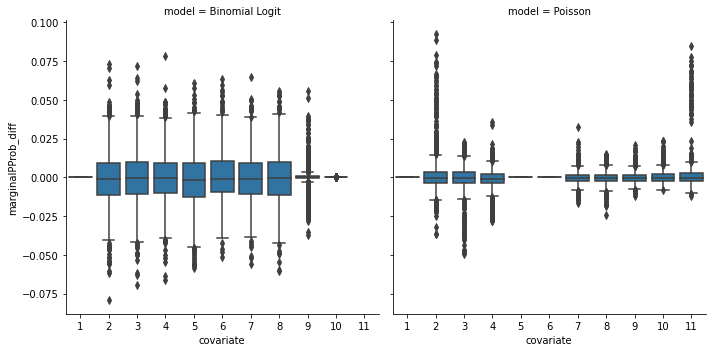

In [121]:
experiment1_df = pd.DataFrame(experiment1)
filt = np.array([(dataset, run) in filter_out for dataset, run in list(zip(experiment1_df.dataset, experiment1_df.run))])
experiment1_df = experiment1_df.loc[~filt]
quantities = ['dataset', 'method', 'run', 'n', 'p', 'model', 'marginalPProb']
df_graph_1 = experiment1_df[quantities].copy()
df_graph_1[[str(i) for i in range(1, 12)]] = pd.DataFrame(df_graph_1.marginalPProb.tolist(), index= df_graph_1.index)
df_graph_1.drop(columns=['marginalPProb'], inplace = True)
df_graph_1_final = pd.melt(df_graph_1, 
                           id_vars=['model', 'method', 'dataset', 'run'], 
                           value_vars=[str(i) for i in range(1, 12)], 
                           var_name='covariate',
                           value_name='marginalPProb')

df_graph_1_final["covariate"] = pd.to_numeric(df_graph_1_final.covariate)

df_graph_1_final = pd.merge(df_graph_1_final[df_graph_1_final.method == "ALASMC"], 
                            df_graph_1_final.loc[df_graph_1_final.method == "LA", ['dataset', 'model', 'marginalPProb', 'covariate']],
                            how='left', on=['model', 'dataset', 'covariate'], suffixes=['', '_LA'])

df_graph_1_final["marginalPProb_diff"] = df_graph_1_final.marginalPProb - df_graph_1_final.marginalPProb_LA
df_graph_1_final.drop(columns=['marginalPProb', 'marginalPProb_LA'], inplace=True)
g = sns.FacetGrid(data=df_graph_1_final, col="model", height=5)
g.map_dataframe(sns.boxplot, x="covariate", y="marginalPProb_diff")
plt.show()